<a href="https://colab.research.google.com/github/DocBot-Bangkit-2021/DocBot-MachineLearningModels/blob/main/Covid-19/Covid19_Baseline_Model_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import seaborn as sns

import os
import zipfile
import shutil

In [2]:
plt.style.use('seaborn')

# **Data Loading**

[Fruits-262](https://www.kaggle.com/aelchimminut/fruits262)

[Fresh and Stale Images of Fruits and Vegetables](https://www.kaggle.com/raghavrpotdar/fresh-and-stale-images-of-fruits-and-vegetables?select=fresh_apple)

[Tomato Cultivars](https://www.kaggle.com/olgabelitskaya/tomato-cultivars?select=01_019.png)

[Fruits 360](https://www.kaggle.com/moltean/fruits)

[Fruits & Vegetables](https://www.kaggle.com/jorgebailon/fruits-vegetables)

[fruits_vegetables_photos](https://www.kaggle.com/balalexv/fruits-vegetables-photos?select=TRAIN)

This dataset contains image data of fruits and vegetables. With six classes namely:

* `Banana`  :  3070 images
* `Apple`  :  3352 images
* `Orange`  :  2977 images
* `Tomato`  :  442 images
* `Broccoli`  :  315 images
* `Carrot`  :  1001 images

**Link for dataset in Google Drive**

https://drive.google.com/file/d/1ruaStccmRUdgpxlI5lD2LDWH9nxoc9VY/view?usp=sharing

In [3]:
# Use this to download easily (only on google colab)
# !gdown --id 1ruaStccmRUdgpxlI5lD2LDWH9nxoc9VY

**Download dataset in Google Drive**

In [4]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
link = 'https://drive.google.com/file/d/1ruaStccmRUdgpxlI5lD2LDWH9nxoc9VY/view?usp=sharing' # The shareable link

In [6]:
# fluff, id = link.split('d/')
id = link.split('d/')[1].split('/view?')[0]
print (id)

1ruaStccmRUdgpxlI5lD2LDWH9nxoc9VY


In [7]:
downloaded = drive.CreateFile({'id':id})  #drive from PyDrive
downloaded.GetContentFile('fruitsvegetables.zip')  

In [8]:
file_zip = 'fruitsvegetables.zip'
zip_ref = zipfile.ZipFile(file_zip, 'r')
zip_ref.extractall('./fruitsvegetables/')
zip_ref.close()

In [9]:
dir = './fruitsvegetables/'
list_category = sorted(os.listdir(dir))
list_category

['apple', 'banana', 'broccoli', 'carrot', 'orange', 'tomato']

# **Data Arrange**

In [10]:
# make directory name for data training and validation (test) 
train_directory = os.path.join(dir, 'train')
validation_directory = os.path.join(dir, 'val')

# check if already exists
if not os.path.exists(train_directory) :
  os.mkdir(train_directory)

if not os.path.exists(validation_directory) :
  os.mkdir(validation_directory)

In [11]:
# check a lot of data for :
# {'apple': 0, 'banana': 1, 'broccoli': 2, 'carrot': 3, 'orange': 4, 'tomato': 5}
apple_dir = os.path.join(dir,'apple')
banana_dir = os.path.join(dir, 'banana')
broccoli_dir = os.path.join(dir, 'broccoli')
carrot_dir = os.path.join(dir,'carrot')
orange_dir = os.path.join(dir, 'orange')
tomato_dir = os.path.join(dir, 'tomato')

print("Apple :", len(os.listdir(apple_dir)))
print("Banana :", len(os.listdir(banana_dir))) 
print("Broccoli :", len(os.listdir(broccoli_dir)))
print("Carrot :", len(os.listdir(carrot_dir)))
print("Orange :", len(os.listdir(orange_dir))) 
print("Tomato :", len(os.listdir(tomato_dir)))

Apple : 3352
Banana : 3070
Broccoli : 315
Carrot : 1001
Orange : 2977
Tomato : 442


In [12]:
from sklearn.model_selection import train_test_split
train_apple_dir, val_apple_dir = train_test_split(os.listdir(apple_dir), test_size = 0.2, random_state=43)
train_banana_dir, val_banana_dir = train_test_split(os.listdir(banana_dir), test_size = 0.2, random_state=43)
train_broccoli_dir, val_broccoli_dir = train_test_split(os.listdir(broccoli_dir), test_size = 0.2, random_state=43)
train_carrot_dir, val_carrot_dir = train_test_split(os.listdir(carrot_dir), test_size = 0.2, random_state=43)
train_orange_dir, val_orange_dir = train_test_split(os.listdir(orange_dir), test_size = 0.2, random_state=43)
train_tomato_dir, val_tomato_dir = train_test_split(os.listdir(tomato_dir), test_size = 0.2, random_state=43)

In [13]:
# spread dir data for train and test (validation)
datasets = [train_directory, validation_directory]

train_apple = os.path.join(train_directory, 'apple')
train_banana = os.path.join(train_directory, 'banana')
train_broccoli = os.path.join(train_directory, 'broccoli')
train_carrot = os.path.join(train_directory, 'carrot')
train_orange = os.path.join(train_directory, 'orange')
train_tomato = os.path.join(train_directory, 'tomato')

val_apple = os.path.join(validation_directory, 'apple')
val_banana = os.path.join(validation_directory, 'banana')
val_broccoli = os.path.join(validation_directory, 'broccoli')
val_carrot = os.path.join(validation_directory, 'carrot')
val_orange = os.path.join(validation_directory, 'orange')
val_tomato = os.path.join(validation_directory, 'tomato')

In [14]:
train_sets = [train_apple, train_banana, train_broccoli, train_carrot, train_orange, train_tomato]
for item in train_sets :
  if not os.path.exists(item):
    os.mkdir(item)

val_sets = [val_apple, val_banana, val_broccoli, val_carrot, val_orange, val_tomato]
for item in val_sets :
  if not os.path.exists(item):
    os.mkdir(item)

In [15]:
category_sets = [apple_dir, banana_dir, broccoli_dir, carrot_dir, orange_dir, tomato_dir]
train_category_sets = [train_apple_dir, train_banana_dir, train_broccoli_dir, train_carrot_dir, train_orange_dir, train_tomato_dir]
val_category_sets = [val_apple_dir, val_banana_dir, val_broccoli_dir, val_carrot_dir, val_orange_dir, val_tomato_dir]

for i in range(len(category_sets)):
  for item in train_category_sets[i]:
    shutil.copy(os.path.join(category_sets[i], item), os.path.join(train_sets[i], item))

for i in range(len(category_sets)):
  for item in val_category_sets[i]:
    shutil.copy(os.path.join(category_sets[i], item), os.path.join(val_sets[i], item))

In [16]:
for i, category in enumerate(train_sets):
  print('train ',list_category[i],' = ',len(os.listdir(category)))

for i, category in enumerate(val_sets):
  print('val ',list_category[i],' = ',len(os.listdir(category)))

train  apple  =  2681
train  banana  =  2456
train  broccoli  =  252
train  carrot  =  800
train  orange  =  2381
train  tomato  =  353
val  apple  =  671
val  banana  =  614
val  broccoli  =  63
val  carrot  =  201
val  orange  =  596
val  tomato  =  89


**Split Folder**

In [17]:
#!pip install split-folders
#import splitfolders

#membagi data menjadi 2 training dan validation, dengan rasio training 80% dan validation 40%
#splitfolders.ratio(path, '/content/data_result', seed=1337, ratio=(.8,.1,.1), group_prefix=None)

# **Exploratory Data Analyis (EDA)**

In [18]:
print(list_category)

['apple', 'banana', 'broccoli', 'carrot', 'orange', 'tomato']


In [19]:
# check a lot of data for paper, rock and scissors
for  item in list_category:
  class_dir = os.path.join(dir,item)
  print(item ," : ",len(os.listdir(class_dir)),"images")

apple  :  3352 images
banana  :  3070 images
broccoli  :  315 images
carrot  :  1001 images
orange  :  2977 images
tomato  :  442 images


In [20]:
# delete dir that is not used
# import shutil

# list_category = ['apple', 'banana', 'broccoli', 'carrot', 'orange', 'tomato']

# for x in listdir_image:
#   if x not in list_category:
#     path = os.path.join(dir_image, x)
#     if os.path.isfile(path):
#         os.remove(path)
#     elif os.path.isdir(path):
#         shutil.rmtree(path)
#     else:
#         print("Unknown or already remove!")

# listdir_image = os.listdir(dir_image)
# listdir_image

In [21]:
# check image (count, size, total)
from PIL import Image
total = 0

for x in list_category:
  dir_cat = os.path.join(dir, x)
  y = len(os.listdir(dir_cat))
  print(x+':', y)
  total = total + y
  
  size = (0,0)
  img_name = os.listdir(dir_cat)
  for i in range(5):
    img_path = os.path.join(dir_cat, img_name[i])
    img = Image.open(img_path)
    
    if size == img.size:
      continue
    else :
      size = img.size
      print('+ size = ',img.size)

print('\nTotal :', total)

apple: 3352
+ size =  (458, 476)
+ size =  (392, 378)
+ size =  (466, 438)
+ size =  (422, 434)
+ size =  (476, 428)
banana: 3070
+ size =  (530, 392)
+ size =  (250, 148)
+ size =  (298, 484)
+ size =  (530, 392)
+ size =  (420, 386)
broccoli: 315
+ size =  (480, 540)
+ size =  (480, 472)
+ size =  (480, 461)
+ size =  (480, 320)
+ size =  (640, 480)
carrot: 1001
+ size =  (400, 266)
+ size =  (284, 178)
+ size =  (2972, 1820)
+ size =  (366, 225)
+ size =  (185, 273)
orange: 2977
+ size =  (438, 418)
+ size =  (256, 256)
+ size =  (190, 178)
tomato: 442
+ size =  (160, 160)
+ size =  (100, 100)
+ size =  (160, 160)
+ size =  (863, 1000)

Total : 11157


apple


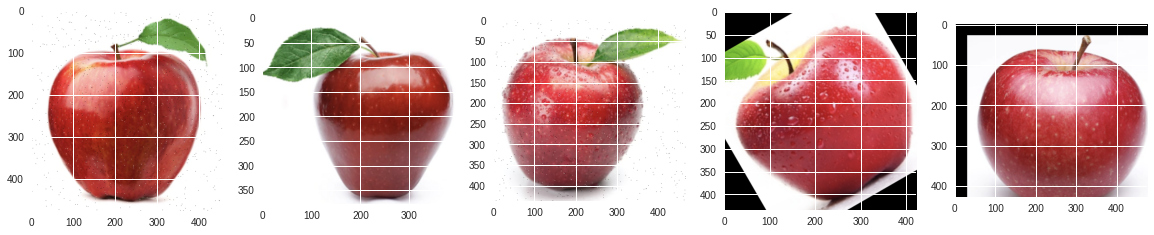

banana


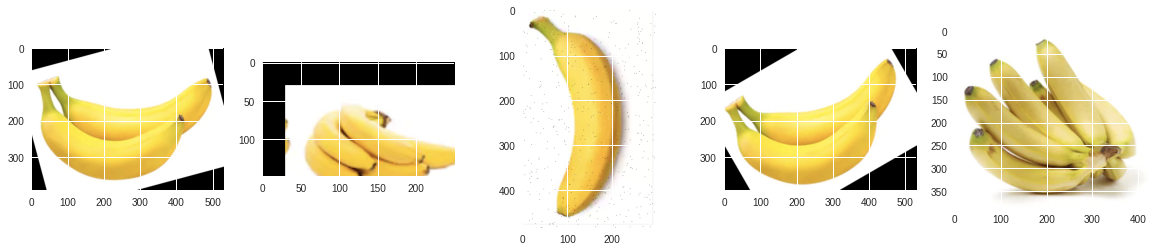

broccoli


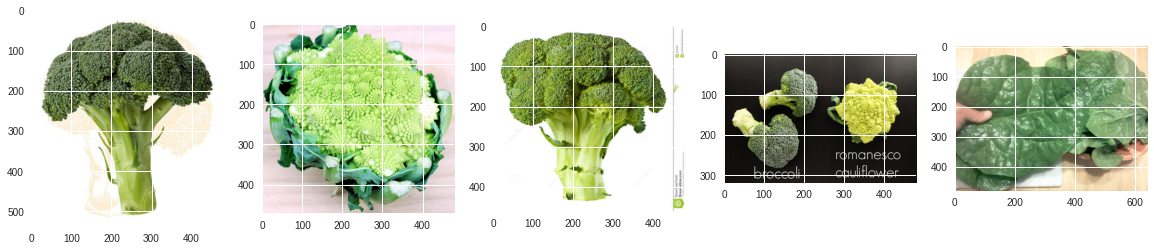

carrot


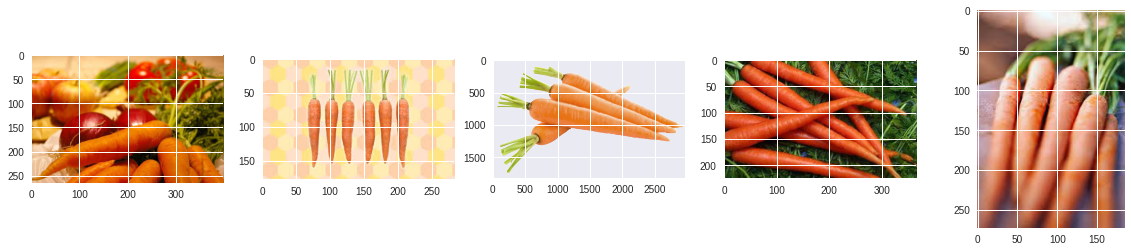

orange


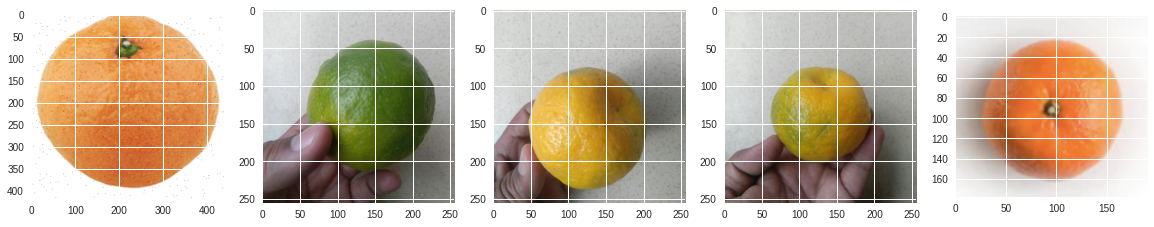

tomato


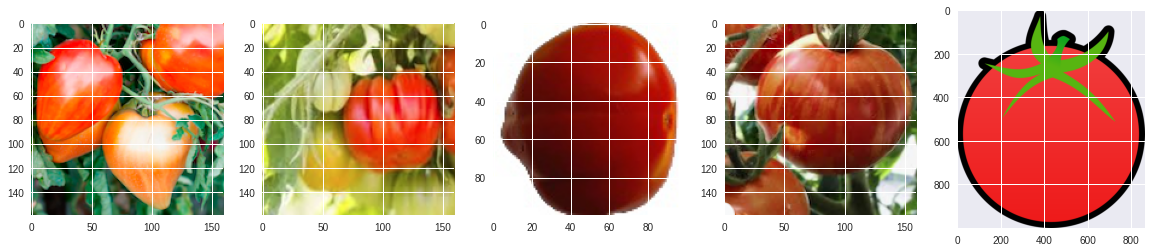

In [22]:
# check images class
for  item in list_category:
  print(item)
  class_dir = os.path.join(dir,item)
  class_images = os.listdir(class_dir)
  plt.figure(figsize=(20, 4))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.imshow(img)
  plt.show()

# **Data Modeling 01**

## **Image Augmentation**

In [23]:
# import library for Machine Learning
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D

In [24]:
# make imagedatagenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    zoom_range=0.2,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    horizontal_flip=True,
                    vertical_flip=True,
                    fill_mode = 'nearest')
val_datagen = ImageDataGenerator(rescale=1./255,)

In [25]:
batch_size = 128
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size =(150,150),
    batch_size = batch_size,
    shuffle=True,
    class_mode = 'categorical'
)

validation_generator = train_datagen.flow_from_directory(
    validation_directory,
    target_size = (150,150),
    batch_size = batch_size,
    shuffle=True,
    class_mode = 'categorical'
)

Found 8921 images belonging to 6 classes.
Found 2234 images belonging to 6 classes.


In [26]:
train_generator.class_indices

{'apple': 0, 'banana': 1, 'broccoli': 2, 'carrot': 3, 'orange': 4, 'tomato': 5}

In [27]:
validation_generator.class_indices

{'apple': 0, 'banana': 1, 'broccoli': 2, 'carrot': 3, 'orange': 4, 'tomato': 5}

In [28]:
label_types = []
for category in train_generator.class_indices:
  label_types.append(category)
label_types

['apple', 'banana', 'broccoli', 'carrot', 'orange', 'tomato']

## **Train Model 01**

In [29]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(6, activation='softmax')  
])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0

In [31]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'RMSprop',
              metrics=['accuracy'])

In [32]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98 and logs.get('val_accuracy')>0.98):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 98%!")
callbacks = myCallback()

In [33]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [34]:
mc = ModelCheckpoint('best_model_2_v1.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [35]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/50
16/69 [=====>........................] - ETA: 51s - loss: 3.1588 - accuracy: 0.3110

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


69/69 [==============================] - ETA: 0s - loss: 1.8353 - accuracy: 0.3804

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


69/69 [==============================] - 122s 1s/step - loss: 1.8353 - accuracy: 0.3804 - val_loss: 1.3627 - val_accuracy: 0.4766

Epoch 00001: val_accuracy improved from -inf to 0.47656, saving model to best_model_1_v1.h5
Epoch 2/50
69/69 [==============================] - 91s 1s/step - loss: 1.0199 - accuracy: 0.6083 - val_loss: 1.1369 - val_accuracy: 0.5501

Epoch 00002: val_accuracy improved from 0.47656 to 0.55009, saving model to best_model_1_v1.h5
Epoch 3/50
69/69 [==============================] - 90s 1s/step - loss: 0.7022 - accuracy: 0.7434 - val_loss: 0.7607 - val_accuracy: 0.7675

Epoch 00003: val_accuracy improved from 0.55009 to 0.76746, saving model to best_model_1_v1.h5
Epoch 4/50
69/69 [==============================] - 88s 1s/step - loss: 0.5372 - accuracy: 0.8150 - val_loss: 0.7528 - val_accuracy: 0.7298

Epoch 00004: val_accuracy did not improve from 0.76746
Epoch 5/50
69/69 [==============================] - 90s 1s/step - loss: 0.3996 - accuracy: 0.8651 - val_loss:

In [36]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

20/70 [=======>......................] - ETA: 50s - loss: 0.2744 - accuracy: 0.9230

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


12/18 [===================>..........] - ETA: 5s - loss: 0.2716 - accuracy: 0.9160

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


18/18 [==============================] - 17s 964ms/step - loss: 0.2621 - accuracy: 0.9190
Accuracy (train):  0.9210850596427917
Accuracy: (test) 0.9189794063568115


### **Plot Model**

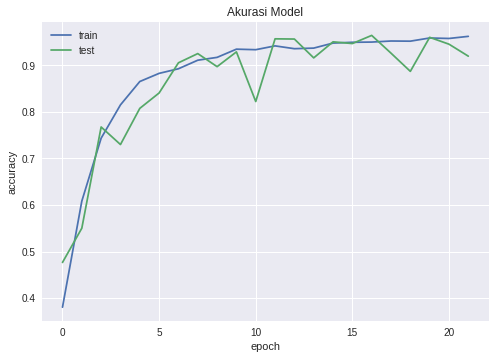

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

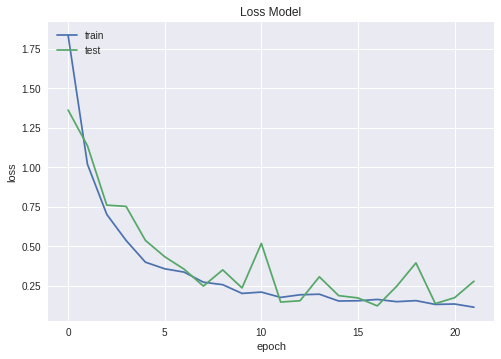

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

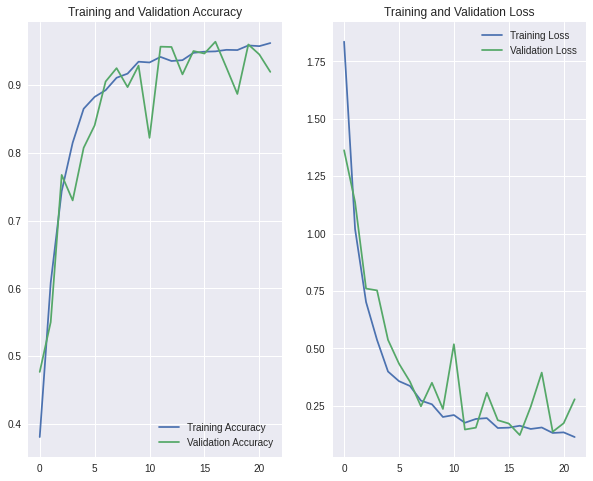

In [39]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving download.jpg to download.jpg
Carrot


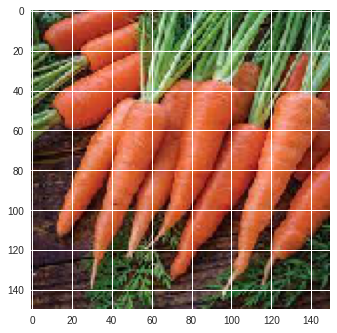

In [40]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Apple')
elif predicted_class_indices == 1:
  print('Banana')
elif predicted_class_indices == 2:
  print('Broccoli')
elif predicted_class_indices == 3:
  print('Carrot')
elif predicted_class_indices == 4:
  print('Orange')
else:
  print('Tomato')

In [41]:
classes

array([[2.2692684e-06, 1.1504178e-09, 1.4809748e-08, 9.9995482e-01,
        1.7220437e-06, 4.1228745e-05]], dtype=float32)

### **Save Model**

In [42]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 232
drwxr-xr-x 2 root root   4096 Jun  2 07:48 assets
-rw-r--r-- 1 root root  22143 Jun  2 07:48 keras_metadata.pb
-rw-r--r-- 1 root root 203040 Jun  2 07:48 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  2 07:48 variables


In [43]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v1.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v1.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [44]:
try:
    files.download('fruitsvegetable_02_v1.tflite')
    files.download('fruitsvegetable_02_v1.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [45]:
from keras.models import load_model
saved_model = load_model('best_model_2_v1.h5')

In [46]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 232
drwxr-xr-x 2 root root   4096 Jun  2 07:48 assets
-rw-r--r-- 1 root root  22143 Jun  2 07:48 keras_metadata.pb
-rw-r--r-- 1 root root 201552 Jun  2 07:48 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  2 07:48 variables


In [47]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v1_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v1_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [48]:
try:
    files.download('fruitsvegetable_02_v1_best.tflite')
    files.download('fruitsvegetable_02_v1_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 02**

In [49]:
import tensorflow as tf
# from tensorflow.keras import applications, optimizers

tf.device('/device:GPU:0')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)      

In [51]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [52]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98 and logs.get('val_accuracy')>0.98):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 98%!")
callbacks = myCallback()

In [53]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [54]:
mc = ModelCheckpoint('best_model_2_v2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [55]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/50
17/69 [======>.......................] - ETA: 49s - loss: 1.4679 - accuracy: 0.4263

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


69/69 [==============================] - ETA: 0s - loss: 0.9761 - accuracy: 0.6258

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


69/69 [==============================] - 90s 1s/step - loss: 0.9761 - accuracy: 0.6258 - val_loss: 0.4626 - val_accuracy: 0.8396

Epoch 00001: val_accuracy improved from -inf to 0.83961, saving model to best_model_1_v2.h5
Epoch 2/50
69/69 [==============================] - 88s 1s/step - loss: 0.3826 - accuracy: 0.8689 - val_loss: 0.3139 - val_accuracy: 0.8920

Epoch 00002: val_accuracy improved from 0.83961 to 0.89200, saving model to best_model_1_v2.h5
Epoch 3/50
69/69 [==============================] - 88s 1s/step - loss: 0.2924 - accuracy: 0.9011 - val_loss: 0.2441 - val_accuracy: 0.9164

Epoch 00003: val_accuracy improved from 0.89200 to 0.91636, saving model to best_model_1_v2.h5
Epoch 4/50
69/69 [==============================] - 88s 1s/step - loss: 0.2325 - accuracy: 0.9209 - val_loss: 0.2252 - val_accuracy: 0.9260

Epoch 00004: val_accuracy improved from 0.91636 to 0.92601, saving model to best_model_1_v2.h5
Epoch 5/50
69/69 [==============================] - 88s 1s/step - loss

In [56]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

 9/70 [==>...........................] - ETA: 1:04 - loss: 0.0726 - accuracy: 0.9731

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 5/18 [=======>......................] - ETA: 13s - loss: 0.0813 - accuracy: 0.9703

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


18/18 [==============================] - 17s 968ms/step - loss: 0.0841 - accuracy: 0.9700
Accuracy (train):  0.9739939570426941
Accuracy: (test) 0.9700089693069458


### **Plot Model**

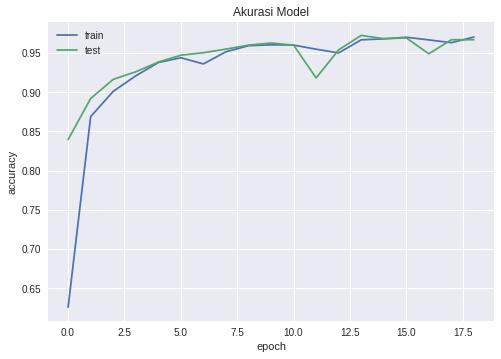

In [57]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

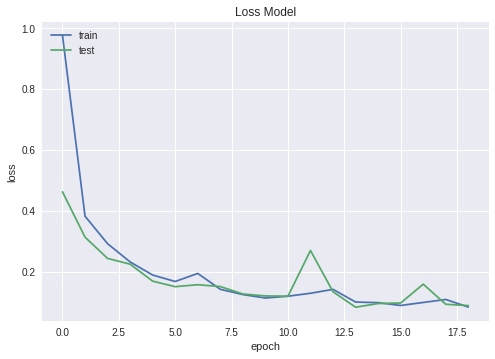

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

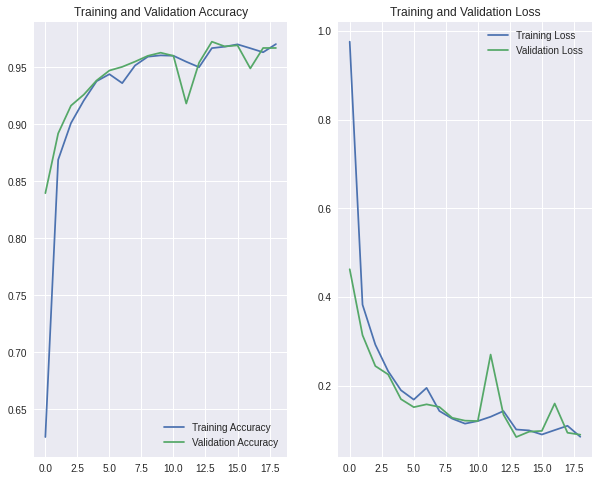

In [59]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving sdsdsd.jpg to sdsdsd.jpg
Broccoli


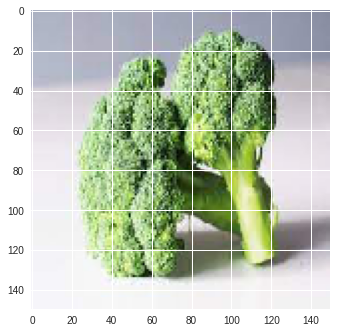

In [60]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Apple')
elif predicted_class_indices == 1:
  print('Banana')
elif predicted_class_indices == 2:
  print('Broccoli')
elif predicted_class_indices == 3:
  print('Carrot')
elif predicted_class_indices == 4:
  print('Orange')
else:
  print('Tomato')

In [61]:
classes

array([[5.4542022e-07, 1.5779336e-10, 9.9987960e-01, 8.9343586e-05,
        1.0447867e-09, 3.0369749e-05]], dtype=float32)

### **Save Model**

In [62]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 244
drwxr-xr-x 2 root root   4096 Jun  2 08:28 assets
-rw-r--r-- 1 root root  23532 Jun  2 08:28 keras_metadata.pb
-rw-r--r-- 1 root root 215869 Jun  2 08:28 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  2 08:28 variables


In [63]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v2.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v2.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [64]:
try:
    files.download('fruitsvegetable_02_v2.tflite')
    files.download('fruitsvegetable_02_v2.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**


In [65]:
from keras.models import load_model
saved_model = load_model('best_model_2_v2.h5')

In [66]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 244
drwxr-xr-x 2 root root   4096 Jun  2 08:28 assets
-rw-r--r-- 1 root root  23532 Jun  2 08:28 keras_metadata.pb
-rw-r--r-- 1 root root 214109 Jun  2 08:28 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  2 08:28 variables


In [67]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v2_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v2_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [68]:
try:
    files.download('fruitsvegetable_02_v2_best.tflite')
    files.download('fruitsvegetable_02_v2_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 03**

In [69]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(6, activation='softmax')
])

In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 64)       

In [71]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [72]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [73]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98 and logs.get('val_accuracy')>0.98):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 98%!")
callbacks = myCallback()

In [74]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [75]:
mc = ModelCheckpoint('best_model_2_v3.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [76]:
# history = model.fit(train_generator,
#                               validation_data=validation_generator,
#                               steps_per_epoch=100,
#                               epochs=15,
#                               validation_steps=50,
#                               verbose=2)

In [77]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/50
 8/69 [==>...........................] - ETA: 59s - loss: 0.4990 - accuracy: 0.2627

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


69/69 [==============================] - ETA: 0s - loss: 0.3850 - accuracy: 0.3947

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


69/69 [==============================] - 92s 1s/step - loss: 0.3850 - accuracy: 0.3947 - val_loss: 0.2849 - val_accuracy: 0.6507

Epoch 00001: val_accuracy improved from -inf to 0.65074, saving model to best_model_1_v3.h5
Epoch 2/50
69/69 [==============================] - 87s 1s/step - loss: 0.2560 - accuracy: 0.6719 - val_loss: 0.2220 - val_accuracy: 0.7224

Epoch 00002: val_accuracy improved from 0.65074 to 0.72243, saving model to best_model_1_v3.h5
Epoch 3/50
69/69 [==============================] - 87s 1s/step - loss: 0.1924 - accuracy: 0.7860 - val_loss: 0.1258 - val_accuracy: 0.8713

Epoch 00003: val_accuracy improved from 0.72243 to 0.87132, saving model to best_model_1_v3.h5
Epoch 4/50
69/69 [==============================] - 88s 1s/step - loss: 0.1502 - accuracy: 0.8290 - val_loss: 0.1528 - val_accuracy: 0.8290

Epoch 00004: val_accuracy did not improve from 0.87132
Epoch 5/50
69/69 [==============================] - 88s 1s/step - loss: 0.1332 - accuracy: 0.8541 - val_loss: 

In [78]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

 8/70 [==>...........................] - ETA: 1:05 - loss: 0.0347 - accuracy: 0.9629

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


16/18 [=========================>....] - ETA: 1s - loss: 0.0324 - accuracy: 0.9624

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


18/18 [==============================] - 17s 944ms/step - loss: 0.0323 - accuracy: 0.9620
Accuracy (train):  0.9709673523902893
Accuracy: (test) 0.9619516730308533


### **Plot Model**

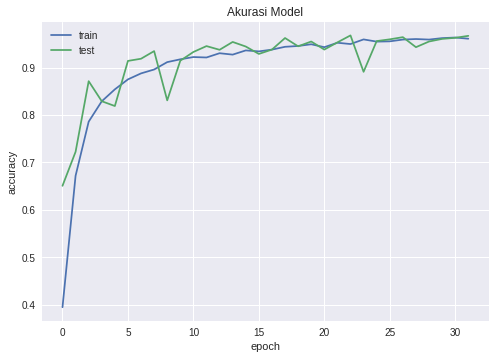

In [79]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

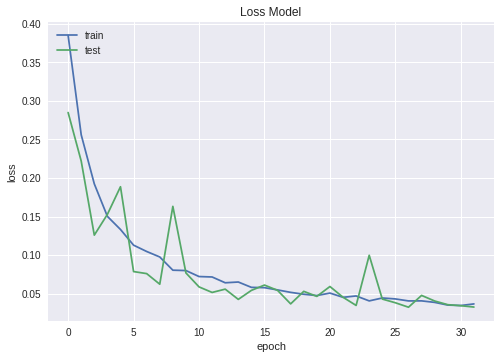

In [80]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

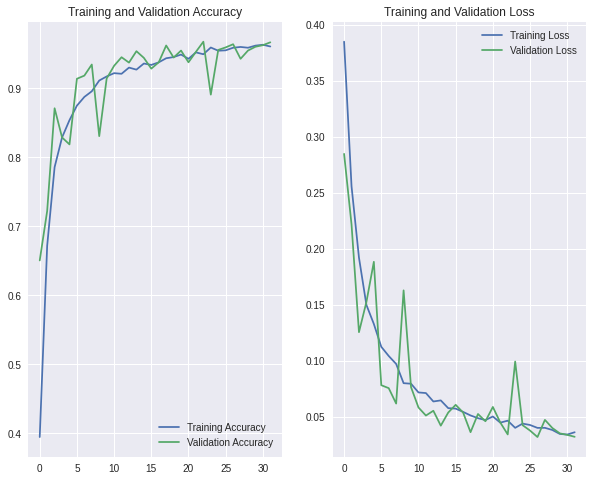

In [81]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving download.jpg to download (1).jpg
Carrot


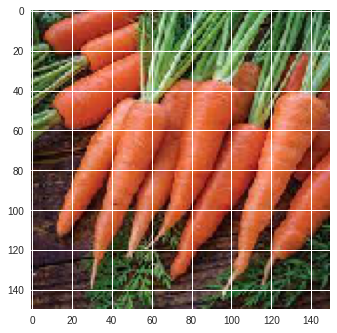

In [82]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Apple')
elif predicted_class_indices == 1:
  print('Banana')
elif predicted_class_indices == 2:
  print('Broccoli')
elif predicted_class_indices == 3:
  print('Carrot')
elif predicted_class_indices == 4:
  print('Orange')
else:
  print('Tomato')

In [83]:
classes

array([[1.0026117e-06, 9.7569576e-14, 3.5179257e-10, 9.9994969e-01,
        6.3343055e-07, 4.8715483e-05]], dtype=float32)

### **Save Model**

In [84]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 252
drwxr-xr-x 2 root root   4096 Jun  2 09:45 assets
-rw-r--r-- 1 root root  26741 Jun  2 09:45 keras_metadata.pb
-rw-r--r-- 1 root root 217440 Jun  2 09:45 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  2 09:45 variables


In [85]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v3.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v3.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [86]:
try:
    files.download('fruitsvegetable_02_v3.tflite')
    files.download('fruitsvegetable_02_v3.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [87]:
from keras.models import load_model
saved_model = load_model('best_model_2_v3.h5')

In [88]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 248
drwxr-xr-x 2 root root   4096 Jun  2 09:45 assets
-rw-r--r-- 1 root root  26741 Jun  2 09:45 keras_metadata.pb
-rw-r--r-- 1 root root 215577 Jun  2 09:45 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  2 09:45 variables


In [89]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v3_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v3_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [90]:
try:
    files.download('fruitsvegetable_02_v3_best.tflite')
    files.download('fruitsvegetable_02_v3_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 04**

In [91]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2

tf.device('/device:GPU:0')

model = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')  
])
model.layers[0].trainable = False

234553344/234545216 [==============================] - 2s 0us/step


In [92]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 5, 5, 2048)        58331648  
_________________________________________________________________
flatten_3 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               26214912  
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 1542      
Total params: 84,679,430
Trainable params: 26,347,782
Non-trainable params: 58,331,648
_________________________________

In [93]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [94]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98 and logs.get('val_accuracy')>0.98):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 98%!")
callbacks = myCallback()

In [95]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [96]:
mc = ModelCheckpoint('best_model_2_v4.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [97]:
# history = model.fit(train_generator,
#                               validation_data=validation_generator,
#                               steps_per_epoch=100,
#                               epochs=15,
#                               validation_steps=50,
#                               verbose=2)

In [98]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/50
14/69 [=====>........................] - ETA: 57s - loss: 3.7053 - accuracy: 0.6747

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


69/69 [==============================] - ETA: 0s - loss: 0.8996 - accuracy: 0.8608

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


69/69 [==============================] - 111s 1s/step - loss: 0.8996 - accuracy: 0.8608 - val_loss: 0.0569 - val_accuracy: 0.9591

Epoch 00001: val_accuracy improved from -inf to 0.95910, saving model to best_model_1_v4.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/50
69/69 [==============================] - 98s 1s/step - loss: 0.1042 - accuracy: 0.9376 - val_loss: 0.0330 - val_accuracy: 0.9756

Epoch 00002: val_accuracy improved from 0.95910 to 0.97564, saving model to best_model_1_v4.h5
Epoch 3/50
69/69 [==============================] - 100s 1s/step - loss: 0.0635 - accuracy: 0.9536 - val_loss: 0.0260 - val_accuracy: 0.9807

Epoch 00003: val_accuracy improved from 0.97564 to 0.98070, saving model to best_model_1_v4.h5
Epoch 4/50
69/69 [==============================] - 98s 1s/step - loss: 0.0507 - accuracy: 0.9654 - val_loss: 0.0776 - val_accuracy: 0.9329

Epoch 00004: val_accuracy did not improve from 0.98070
Epoch 5/50
69/69 [==============================] - 98s 1s/step - loss: 0.0396 - accuracy: 0.9691 - val_loss: 0.0199 - val_accuracy: 0.9798

Epoch 00005: val_accuracy did not improve from 0.98070
Epoch 6/50
69/69 [==============================] - 98s 1s/step - loss: 0.0375 - accuracy: 0.9723 - val_loss: 0.0252 - val_accuracy: 0.

In [99]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

 4/70 [>.............................] - ETA: 1:04 - loss: 0.0299 - accuracy: 0.9805

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 5/18 [=======>......................] - ETA: 13s - loss: 0.0281 - accuracy: 0.9812

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


18/18 [==============================] - 21s 1s/step - loss: 0.0227 - accuracy: 0.9799
Accuracy (train):  0.9802712798118591
Accuracy: (test) 0.9798567295074463


### **Plot Model**

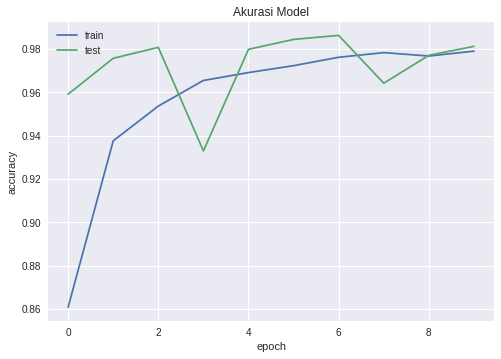

In [100]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

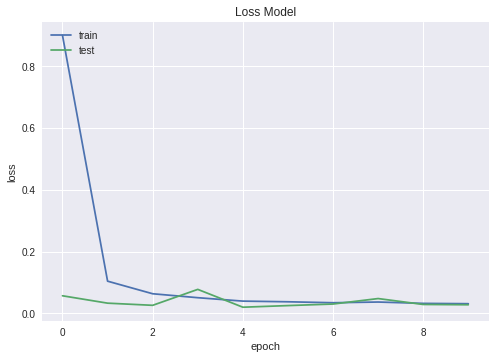

In [101]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

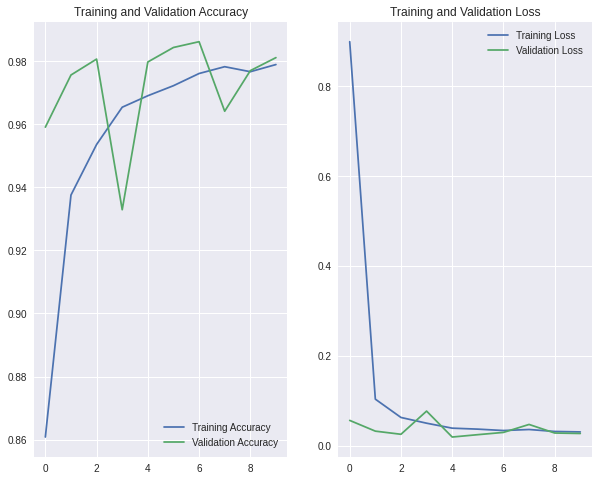

In [102]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving download.jpg to download (2).jpg
Carrot


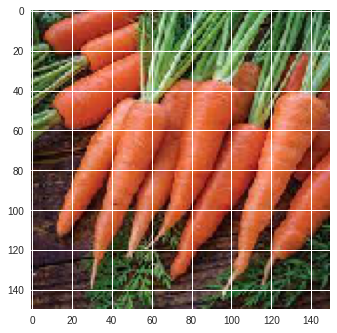

In [103]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Apple')
elif predicted_class_indices == 1:
  print('Banana')
elif predicted_class_indices == 2:
  print('Broccoli')
elif predicted_class_indices == 3:
  print('Carrot')
elif predicted_class_indices == 4:
  print('Orange')
else:
  print('Tomato')

In [104]:
classes

array([[0., 0., 0., 1., 0., 0.]], dtype=float32)

### **Save Model**

In [112]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 15192
drwxr-xr-x 2 root root     4096 Jun  2 10:18 assets
-rw-r--r-- 1 root root  1735730 Jun  2 10:18 keras_metadata.pb
-rw-r--r-- 1 root root 13809046 Jun  2 10:18 saved_model.pb
drwxr-xr-x 2 root root     4096 Jun  2 10:18 variables


In [113]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v4.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v4.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [114]:
try:
    files.download('fruitsvegetable_02_v4.tflite')
    files.download('fruitsvegetable_02_v4.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [115]:
from keras.models import load_model
saved_model = load_model('best_model_2_v4.h5')

In [116]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up



/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 15192
drwxr-xr-x 2 root root     4096 Jun  2 10:21 assets
-rw-r--r-- 1 root root  1735729 Jun  2 10:21 keras_metadata.pb
-rw-r--r-- 1 root root 13807971 Jun  2 10:21 saved_model.pb
drwxr-xr-x 2 root root     4096 Jun  2 10:21 variables


In [117]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v4_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v4_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [118]:
try:
    files.download('fruitsvegetable_02_v4_best.tflite')
    files.download('fruitsvegetable_02_v4_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>